In [67]:
import numpy as np
import cv2
from math import sqrt,pi,exp
from matplotlib.pyplot import bar
import skimage.io as io
import matplotlib.pyplot as plt
import scipy
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from commonfunction import *
from pip._internal import main as install
from skimage.filters import sobel_h, sobel, sobel_v, roberts, prewitt

In [68]:

avgMean=0
img = cv2.imread('1.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('2.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('3.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('4.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('5.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('6.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('7.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('8.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('9.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('10.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('11.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print("11" ,var,"   ", mean)
avgMean/=11

print("g" ,var,"   ", mean)

2035.5912231599293     242.91985050665193
2496.943592563108     243.8088887429387
2409.878757528085     244.18458188672807
2000.1150138669684     246.2859026181345
2381.806441761327     244.72021601597268
4146.815622860158     236.32115126296463
4392.754520870507     236.41967443547344
6474.403854934875     225.44299995281202
6574.549840454742     224.80675325872195
4989.285404283178     233.6459589231584
11 6218.803296613624     227.03423660430974
g 6218.803296613624     227.03423660430974


In [69]:
def GaussianDistribution(mean,var):
    distribution=np.zeros(256)
    for i in range(256):
        distribution[i]=1/sqrt(2*pi*sqrt(var))*exp(-1*((i-mean)**2)/(2*var))
    return distribution

In [70]:
def CDF(gaussian):
    return np.cumsum(gaussian)

In [71]:
def mappingIntesity():
    Mapped={}
    for i in range(256):
        Mapped[i]=255
        toFind=CDFReal[i]
        for j in range(256):
            if(abs(toFind-CDFIdeal[j])<=0.1):
                Mapped[i]=j
                break
    return Mapped


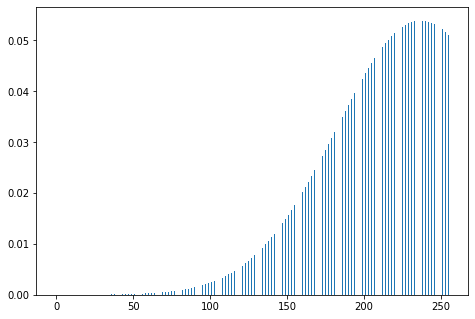

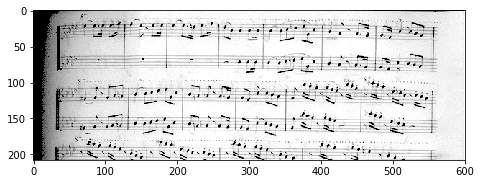

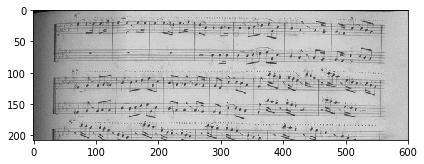

In [72]:
def showDistrubution(YData):
    X = np.arange(256)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, YData,width = 0.25)

def applyGaussianMapping(imgDist):
    img = cv2.imread(imgDist, 0)
    var = np.var(img)
    mean = np.mean(img)
    dataIdeal=GaussianDistribution(avgMean,3000)
    dataReal=GaussianDistribution(mean,var)
    showDistrubution(dataIdeal)
    showDistrubution(dataReal)
    CDFIdeal=CDF(dataIdeal)
    CDFReal=CDF(dataReal)
    intensityMap=mappingIntesity()
    imgCopy=np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j]=intensityMap[img[i][j]]
    
    io.imshow(img)
    io.show()
    io.imshow(imgCopy)
    io.show()
    cv2.imwrite("out.png", img) 
    return img


enhancedImg = applyGaussianMapping('LB1.png')




In [73]:
def calcUb(img, imgHist, t):
    imgCopy = np.copy(img)
    size = img.shape[0]*img.shape[1]
    indeciesGreaterThanT = np.where(imgHist[1] >= t)
    indeciesLessThanT = np.where(imgHist[1] < t)
    indeciesGreaterThanT = np.array(indeciesGreaterThanT)
    indeciesLessThanT = np.array(indeciesLessThanT)
    grayLevelsGreater = np.zeros(indeciesGreaterThanT.shape[1])
    grayLevelsLess = np.zeros(indeciesLessThanT.shape[1])
    grayLevelsGreaterProb = np.zeros(indeciesGreaterThanT.shape[1])
    grayLevelsLessProb = np.zeros(indeciesLessThanT.shape[1])
    i = 0
    for index in indeciesGreaterThanT[0]:
        grayLevelsGreater[i] = imgHist[1][index]
        grayLevelsGreaterProb[i] = imgHist[0][index]
        i += 1
    i = 0
    for index in indeciesLessThanT[0]:
        grayLevelsLess[i] = imgHist[1][index]
        grayLevelsLessProb[i] = imgHist[0][index]
        i += 1
    size = img.shape[0]*img.shape[1]

    grayLevelsGreaterProb = grayLevelsGreaterProb/size
    grayLevelsLessProb = grayLevelsLessProb/size
    w1 = np.sum(grayLevelsLessProb)
    w2 = np.sum(grayLevelsGreaterProb)
    u1 = 0
    u2 = 0
    for x in range(grayLevelsLess.shape[0]):
        u1 += ((grayLevelsLess[x]*grayLevelsLessProb[x])/w1)
    for x in range(grayLevelsGreater.shape[0]):
        u2 += ((grayLevelsGreater[x]*grayLevelsGreaterProb[x])/w2)
    ub = w1*w2*(u1-u2)**2
    return ub


def OTSU_Binarization(grayImg):
    Threshold = 0
    Ub = 0
    imgHist = showHist(grayImg)
    for t in range(255):
        Ubtmp = calcUb(grayImg, imgHist, t)
        if(Ubtmp > Ub):
            Threshold = t
            Ub = Ubtmp
    img = np.where(grayImg >= Threshold, 0, 1)
    return img


In [74]:
img = cv2.imread("LB1.png", 0)

BinarizedImage = 1 - OTSU_Binarization(img)


cv2.imwrite('BinarizedImage.png',BinarizedImage*255)

True